In [1093]:
import pandas as pd
import numpy as np
import re
import os

In [1094]:
import matplotlib.pyplot as plt

In [1095]:
import seaborn as sns

# TRAIN RESULTS

Estos son los resultados del entrenamiento (history). Está recogido el máximo valor de cada una de las métricas y de la loss (no sabemos que epoch es)

In [1096]:
path = '/home/mr1142/Documents/Data/models/neumonia/training_data/train_max.csv'
df_train = pd.read_csv(path)

In [1097]:
p = '/home/mr1142/Documents/Data/models/neumonia'
modelos = os.listdir(p)
modelos = [modelo[:-3] for modelo in modelos if os.path.isfile(os.path.join(p, modelo))]
modelos = [modelo for modelo in modelos if not bool(re.search('completo', modelo))]
modelos_evaluados = list(df_train['name'])

In [1098]:
print(len(modelos))
print(len(modelos_evaluados))

89
89


In [1037]:
evaluados_de_menos = list(set(modelos)-set(modelos_evaluados))
evaluados_de_menos

[]

In [1039]:
evaluados_de_mas = list(set(modelos_evaluados)-set(modelos))
ix = [i for i in df_train.index if df_train.name[i] in evaluados_de_mas]
evaluados_de_mas

['prueba_mask_IncResNet_fine-03_batch-8_lr--05_auc-84']

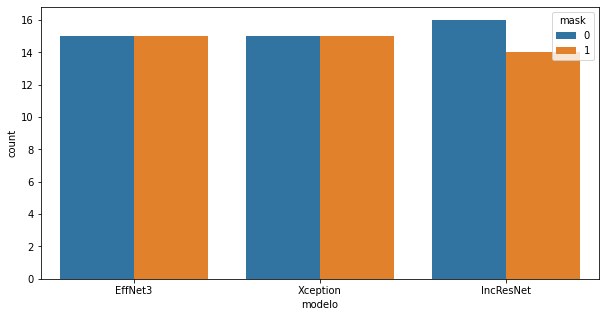

In [1027]:
plt.subplots(figsize=(10,5))
p = sns.countplot(x="modelo",
                hue="mask",
                data=df_train)

In [1030]:
df_train[df_train.modelo == 'IncResNet'].sort_values(['fine', 'lr', 'mask'])

,name,modelo,fine,batch,lr,mask,trainprop,pixels,subset,loss,binary_accuracy,precision,auc,val_loss,val_binary_accuracy,val_precision,val_auc
86,prueba_IncResNet_fine-03_batch-8_lr--05_auc-84,IncResNet,0.3,8,0.00001,0,0.8,512,1.0,1.715717,0.995411,0.994975,0.999860,1.124629e+00,0.770000,0.666667,0.849856
89,prueba_mask_IncResNet_fine-03_batch-8_lr--05_a...,IncResNet,0.3,8,0.00001,0,0.8,512,1.0,1.600966,0.989987,0.987421,0.999694,1.209644e+00,0.770000,0.666667,0.845500
28,prueba_IncResNet_fine-03_batch-8_lr-0001_auc-94,IncResNet,0.3,8,0.00010,0,0.8,512,1.0,1.260808,0.995828,0.993742,0.999776,2.095761e+00,0.891667,0.842640,0.948006
36,prueba_mask_IncResNet_fine-03_batch-8_lr-0001_...,IncResNet,0.3,8,0.00010,1,0.8,512,1.0,1.144002,0.979975,0.969962,0.997255,1.268692e+00,0.856667,0.785000,0.911038
61,prueba_IncResNet_fine-03_batch-8_lr-001_auc-87,IncResNet,0.3,8,0.00100,0,0.8,512,1.0,1.623771,0.773467,0.707386,0.882917,2.430985e+07,0.791667,0.720000,0.879350
60,prueba_mask_IncResNet_fine-03_batch-8_lr-001_a...,IncResNet,0.3,8,0.00100,1,0.8,512,1.0,1.319172,0.932833,0.899749,0.977675,6.069530e+03,0.803333,0.705000,0.852363
63,prueba_IncResNet_fine-05_batch-8_lr--05_auc-83,IncResNet,0.5,8,0.00001,0,0.8,512,1.0,1.719204,0.994994,0.993726,0.999635,1.167631e+00,0.770000,0.666667,0.833581
62,prueba_mask_IncResNet_fine-05_batch-8_lr--05_a...,IncResNet,0.5,8,0.00001,1,0.8,512,1.0,1.709749,0.970797,0.959647,0.995702,1.103577e+00,0.786667,0.714286,0.856300
27,prueba_IncResNet_fine-05_batch-8_lr-0001_auc-92,IncResNet,0.5,8,0.00010,0,0.8,512,1.0,1.211847,0.993325,0.989987,0.999795,1.216238e+00,0.866667,0.803030,0.924950
38,prueba_mask_IncResNet_fine-05_batch-8_lr-0001_...,IncResNet,0.5,8,0.00010,1,0.8,512,1.0,1.304167,0.997497,0.996245,0.999937,1.210742e+00,0.883333,0.825000,0.957837


## Ploteo

In [829]:
y = 'val_auc'
data = df_train
lim = np.percentile(data[y], 20)

[(0.8530900359153748, 1.0)]

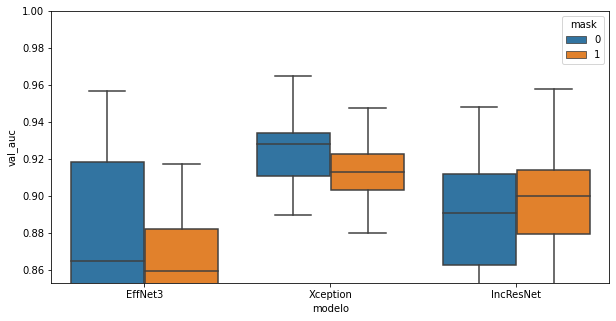

In [830]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.8530900359153748, 1.0)]

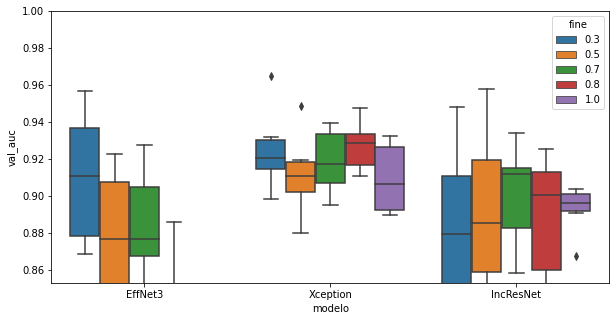

In [831]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="fine",
                data=data)
p.set(ylim=(lim, 1))

[(0.8530900359153748, 1.0)]

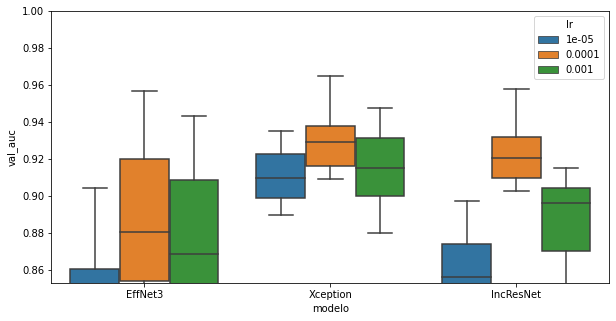

In [832]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

[(0.8530900359153748, 1.0)]

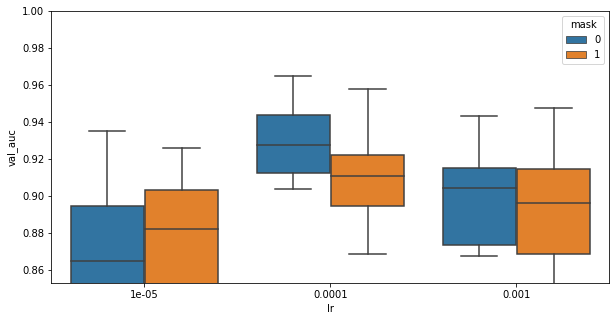

In [833]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="lr", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.8530900359153748, 1.0)]

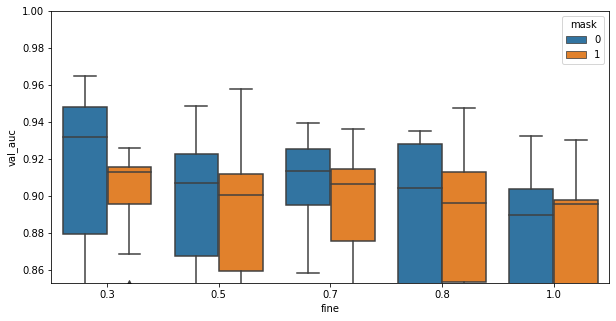

In [834]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.8530900359153748, 1.0)]

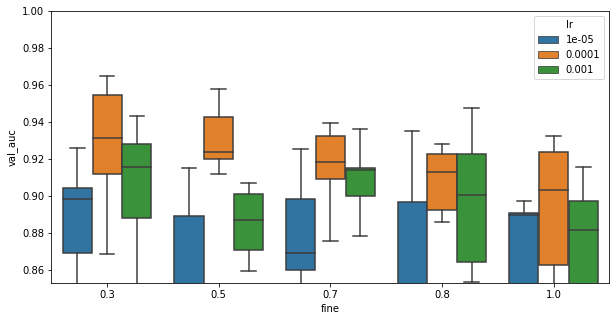

In [835]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

# SUBSET TEST EVALUATION RESULTS

Estos son los resultados de aplicar model.evaluate() sobre el subset de X_train que he seleccionado para test.

In [1062]:
path = '/home/mr1142/Documents/Data/models/neumonia/validation_results/image_class_evaluation.csv'
df_test = pd.read_csv(path)

### Modelos sin evaluar

In [1063]:
p = '/home/mr1142/Documents/Data/models/neumonia'
modelos = os.listdir(p)
modelos = [modelo[:-3] for modelo in modelos if os.path.isfile(os.path.join(p, modelo))]
modelos = [modelo for modelo in modelos if not bool(re.search('completo', modelo))]
modelos_evaluados = list(df_test['nombre'])

In [1064]:
modelos_evaluados_resto = [modelo for modelo in modelos_evaluados if 
                           bool(re.search('resto', modelo))]
modelos_evaluados_resto = [re.split('_resto', modelo)[0] for 
                           modelo in modelos_evaluados_resto]

In [1065]:
print(len(modelos))
print(len(modelos_evaluados))

89
156


In [1066]:
evaluados_de_mas = list(set(modelos_evaluados) - set(modelos))
evaluados_de_mas = [modelo for modelo in evaluados_de_mas if not
                  bool(re.search('resto', modelo))]
ix = [i for i in df_test.index if df_test.nombre[i] in evaluados_de_mas]
evaluados_de_mas

[]

In [1067]:
evaluados_de_menos = list(set(modelos)-set(modelos_evaluados))
evaluados_de_menos

[]

In [1068]:
# list(set(modelos_evaluados)-set(modelos))

In [1069]:
modelos_train = set(df_train['name'])
list(set(modelos_train)-set(modelos_evaluados))

[]

In [1070]:
df_test = df_test.reset_index(drop = True)

## RESTO

In [893]:
index = [i for i in df_test.index if bool(re.search('resto', df_test['nombre'][i]))]
df_resto = df_test.iloc[index]

In [894]:
df_resto = df_resto.reset_index(drop = True)

In [895]:
df_resto['mask'] = list(map(lambda x: bool(re.search('mask', x)), df_resto['nombre']))

In [896]:
df_resto['modelo'] = list(map(lambda x: re.split('_', x)[-6], df_resto['nombre']))
df_resto['lr'] = list(map(lambda x: re.split('-', re.split('_', x)[-3])[1], df_resto['nombre']))
df_resto['batch'] = list(map(lambda x: re.split('-', re.split('_', x)[-4])[1], df_resto['nombre']))
df_resto['fine'] = list(map(lambda x: re.split('-', re.split('_', x)[-5])[1], df_resto['nombre']))

In [897]:
df_resto

,nombre,loss,binary_accuracy,precision,auc,mask,modelo,lr,batch,fine
0,prueba_EffNet3_fine-05_batch-8_lr-0001_auc-92_...,0.522258,0.852604,0.790152,0.926065,False,EffNet3,0001,8,05
1,prueba_Xception_fine-08_batch-8_lr--05_auc-93_...,0.492753,0.861533,0.799576,0.936951,False,Xception,,8,08
2,prueba_mask_Xception_fine-08_batch-8_lr-0001_a...,0.580660,0.832953,0.758784,0.907422,True,Xception,0001,8,08
3,prueba_Xception_fine-07_batch-8_lr--05_auc-92_...,0.536018,0.848225,0.783377,0.925145,False,Xception,,8,07
4,prueba_Xception_fine-05_batch-8_lr--05_auc-91_...,0.594727,0.816369,0.734754,0.899587,False,Xception,,8,05
...,...,...,...,...,...,...,...,...,...,...
61,prueba_mask_Xception_fine-07_batch-8_lr-001_au...,0.582290,0.836653,0.760913,0.910656,True,Xception,001,8,07
62,prueba_IncResNet_fine-03_batch-8_lr-0001_auc-9...,0.497002,0.872433,0.817967,0.935587,False,IncResNet,0001,8,03
63,prueba_Xception_fine-05_batch-8_lr-001_auc-90_...,0.529515,0.823123,0.738451,0.919830,False,Xception,001,8,05
64,prueba_mask_EffNet3_fine-00_batch-8_lr--05_auc...,1.111433,0.567178,0.350765,0.580147,True,EffNet3,,8,00


### Ploteo

In [898]:
y = 'binary_accuracy'
data = df_resto
lim = np.percentile(data[y], 20)

[(0.7865371108055115, 1.0)]

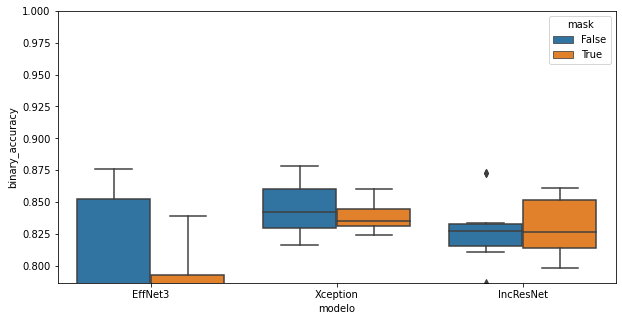

In [899]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.7865371108055115, 1.0)]

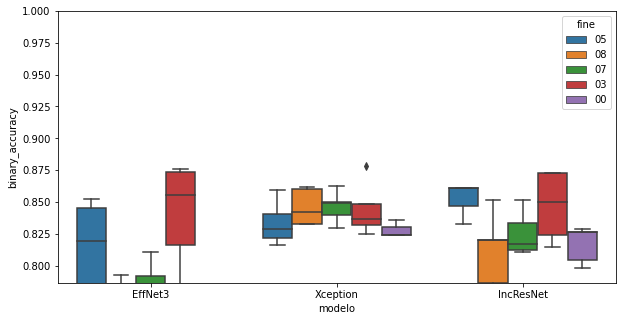

In [900]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="fine",
                data=data)
p.set(ylim=(lim, 1))

[(0.7865371108055115, 1.0)]

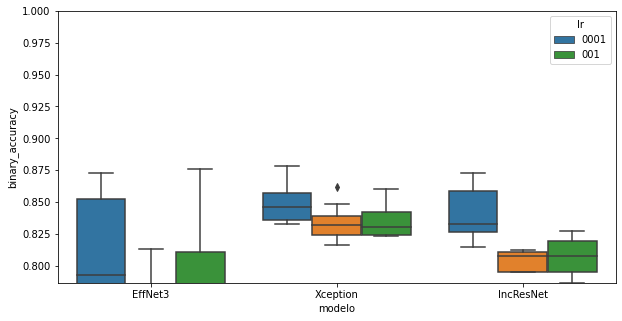

In [901]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

[(0.7865371108055115, 1.0)]

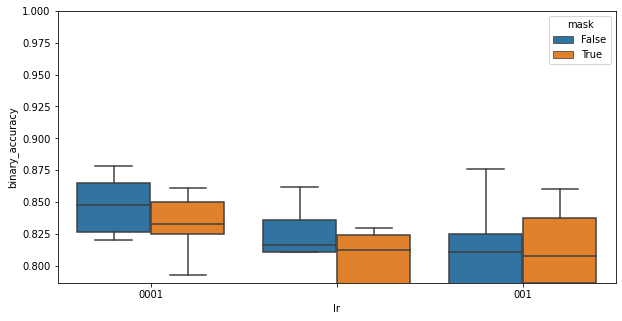

In [902]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="lr", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.7865371108055115, 1.0)]

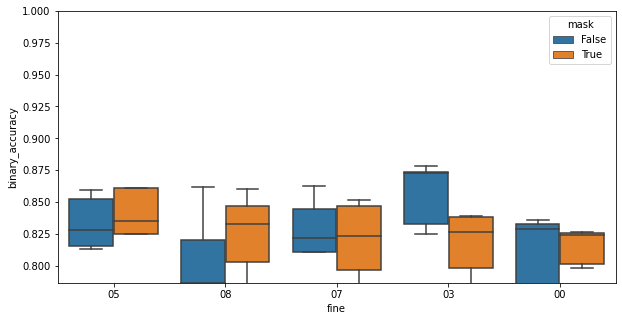

In [903]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.7865371108055115, 1.0)]

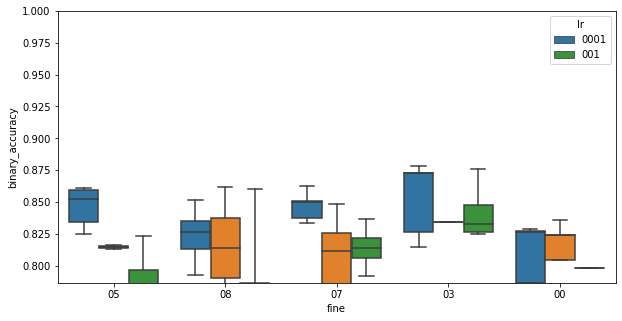

In [904]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

## SUBSET

In [905]:
index = list(set(df_test.index) - set(index))
df_test = df_test.iloc[index]

In [906]:
df_test = df_test.reset_index(drop = True)

In [907]:
df_test['mask'] = list(map(lambda x: bool(re.search('mask', x)), df_test['nombre']))

In [908]:
df_test['modelo'] = list(map(lambda x: re.split('_', x)[-5], df_test['nombre']))
df_test['lr'] = list(map(lambda x: re.split('-', re.split('_', x)[-2])[1], df_test['nombre']))
df_test['batch'] = list(map(lambda x: re.split('-', re.split('_', x)[-3])[1], df_test['nombre']))
df_test['fine'] = list(map(lambda x: re.split('-', re.split('_', x)[-4])[1], df_test['nombre']))

In [909]:
df_test.sort_values('auc').tail()

,nombre,loss,binary_accuracy,precision,auc,mask,modelo,lr,batch,fine
35,prueba_Xception_fine-03_batch-8_lr-0001_auc-96,0.549459,0.848849,0.775202,0.928931,False,Xception,0001,8,03
10,prueba_Xception_fine-07_batch-8_lr-0001_auc-93,0.485459,0.848849,0.786164,0.930917,False,Xception,0001,8,07
4,prueba_EffNet3_fine-03_batch-8_lr-001_auc-94,0.488490,0.863196,0.803296,0.931229,False,EffNet3,001,8,03
57,prueba_Xception_fine-08_batch-8_lr-001_auc-92,0.525883,0.861862,0.796954,0.931729,False,Xception,001,8,08
3,prueba_EffNet3_fine-03_batch-8_lr-0001_auc-95,0.436792,0.871204,0.813075,0.945697,False,EffNet3,0001,8,03


### Ploteo

In [910]:
y = 'precision'
data = df_test
lim = np.percentile(data[y], 20)

[(0.6577572226524353, 1.0)]

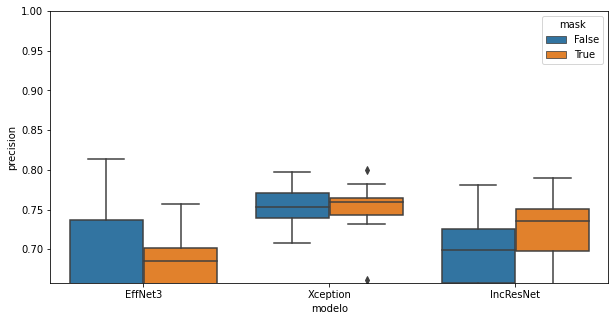

In [911]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.6577572226524353, 1.0)]

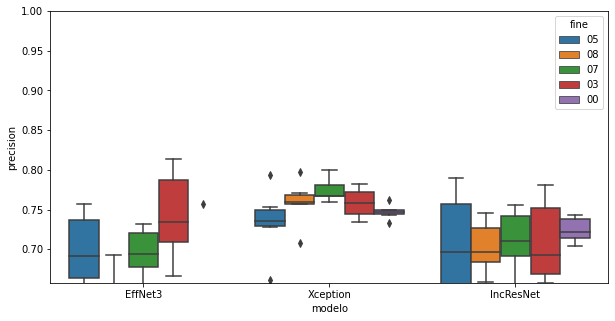

In [912]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="fine",
                data=data)
p.set(ylim=(lim, 1))

[(0.6577572226524353, 1.0)]

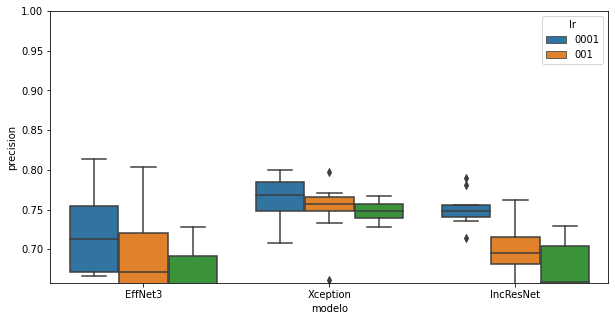

In [913]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

[(0.6577572226524353, 1.0)]

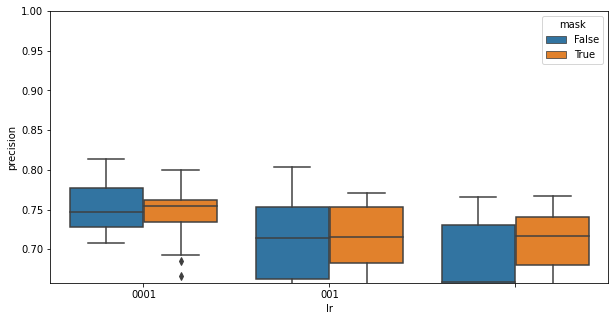

In [914]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="lr", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.6577572226524353, 1.0)]

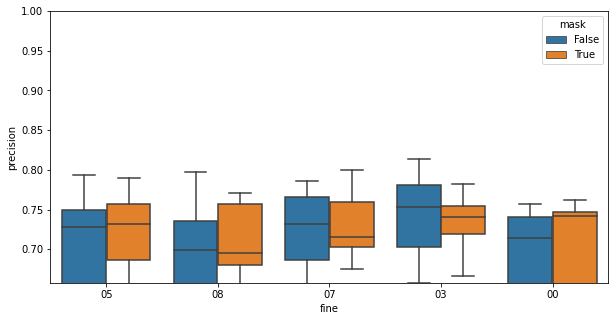

In [915]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.6577572226524353, 1.0)]

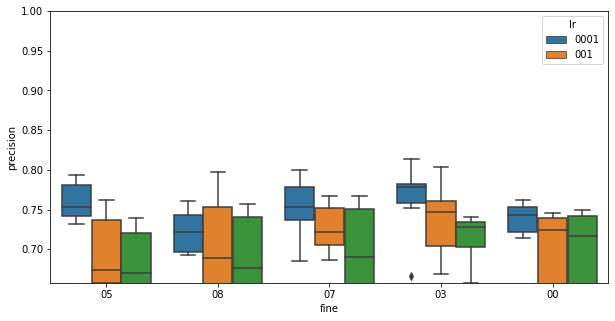

In [916]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

# SUBSET TEST PREDICTION METRICS

Estos son los resultados de aplicar model.predict() sobre el subset de X_train que he seleccionado para test. Sobre las predicciones se calculan unas métricas personalizadas

In [1085]:
path = '/home/mr1142/Documents/Data/models/neumonia/validation_results/prediction_validation_metrics.csv'
df = pd.read_csv(path)

### Modelos sin evaluar

In [1086]:
p = '/home/mr1142/Documents/Data/models/neumonia'
modelos = os.listdir(p)
modelos = [modelo[:-3] for modelo in modelos if os.path.isfile(os.path.join(p, modelo))]
modelos = [modelo for modelo in modelos if not bool(re.search('completo', modelo))]
modelos_evaluados = list(df['name'])

In [1087]:
modelos_evaluados_resto = [modelo for modelo in modelos_evaluados if 
                           bool(re.search('resto', modelo))]
modelos_evaluados_resto = [re.split('_resto', modelo)[0] for 
                           modelo in modelos_evaluados_resto]

In [1088]:
evaluados_de_mas = list(set(modelos_evaluados) - set(modelos))
evaluados_de_mas = [modelo for modelo in evaluados_de_mas if not
                  bool(re.search('resto', modelo))]
ix = [i for i in df.index if df.name[i] in evaluados_de_mas]
evaluados_de_mas

[]

In [1089]:
evaluados_de_menos = list(set(modelos)-set(modelos_evaluados))
evaluados_de_menos

[]

In [1090]:
modelos_a_evaluar_resto = list(set(modelos)-set(modelos_evaluados_resto))
len(modelos_a_evaluar_resto)

33

In [1091]:
modelos_train = set(df_train['name'])
list(set(modelos_train)-set(modelos_evaluados))

[]

In [1092]:
df = df.reset_index(drop = True)

## RESTO

In [639]:
index = [i for i in df.index if bool(re.search('resto', df['name'][i]))]
df_resto = df.iloc[index]

In [640]:
df_resto = df_resto.reset_index(drop = True)

In [641]:
df_resto['auc_mean'] = (df_resto['auc_0']+df_resto['auc_1']+df_resto['auc_2'])/3
df_resto['accuracy_mean'] = (df_resto['accuracy_score_0']+
                             df_resto['accuracy_score_1']+
                             df_resto['accuracy_score_2'])/3

In [642]:
df_resto.sort_values('auc_mean').tail()

,name,auc_0,younden_0,pr_max_0,pr_cut_0,auc_1,younden_1,pr_max_1,pr_cut_1,auc_2,...,"precision_score[0, 2]","recall_score[0, 2]","accuracy_score[0, 2]","f1_score[1, 2]","precision_score[1, 2]","recall_score[1, 2]","accuracy_score[1, 2]",completo,auc_mean,accuracy_mean
7,prueba_EffNet3_fine-03_batch-8_lr-001_auc-94_r...,0.974926,0.391551,0.364874,0.3467031419277191,0.897896,0.325556,0.318853,0.4573602974414826,0.929047,...,0.879674,0.705830,0.705830,0.881764,0.884650,0.879584,0.879584,False,0.933956,0.874935
36,prueba_mask_IncResNet_fine-03_batch-8_lr-0001_...,0.964606,0.626558,0.622067,0.666806697845459,0.888898,0.069674,0.035041,0.16499201953411102,0.950058,...,0.887700,0.729359,0.729359,0.812053,0.893080,0.788754,0.788754,False,0.934521,0.810674
32,prueba_Xception_fine-03_batch-8_lr-0001_auc-96...,0.979880,0.414729,0.364114,0.5308434963226318,0.902144,0.258009,0.153467,0.5438005924224854,0.929051,...,0.880504,0.757970,0.757970,0.883830,0.882118,0.886908,0.886908,False,0.937025,0.878278
13,prueba_Xception_fine-07_batch-8_lr-0001_auc-93...,0.982743,0.298095,0.273896,0.3383646011352539,0.904439,0.253418,0.185119,0.3660778999328613,0.924378,...,0.880027,0.668235,0.668235,0.831298,0.871358,0.815175,0.815175,False,0.937187,0.861006
6,prueba_EffNet3_fine-03_batch-8_lr-0001_auc-95_...,0.986002,0.373820,0.373820,0.42770496010780334,0.916031,0.160859,0.132412,0.30670493841171265,0.934488,...,0.880094,0.689197,0.689197,0.862553,0.888442,0.851828,0.851828,False,0.945507,0.872060


In [351]:
df_resto.name.iloc[3]

'prueba_Xception_fine-07_batch-8_lr--05_auc-92_resto'

In [352]:
df_resto['mask'] = list(map(lambda x: bool(re.search('mask', x)), df_resto['name']))

In [353]:
df_resto['modelo'] = list(map(lambda x: re.split('_', x)[-6], df_resto['name']))
df_resto['lr'] = list(map(lambda x: re.split('-', re.split('_', x)[-3])[1], df_resto['name']))
df_resto['batch'] = list(map(lambda x: re.split('-', re.split('_', x)[-4])[1], df_resto['name']))
df_resto['fine'] = list(map(lambda x: re.split('-', re.split('_', x)[-5])[1], df_resto['name']))

In [354]:
df_resto.columns

Index(['name', 'auc_0', 'younden_0', 'pr_max_0', 'pr_cut_0', 'auc_1',
       'younden_1', 'pr_max_1', 'pr_cut_1', 'auc_2', 'younden_2', 'pr_max_2',
       'pr_cut_2', 'f1_score_0', 'precision_score_0', 'recall_score_0',
       'accuracy_score_0', 'f1_score_1', 'precision_score_1', 'recall_score_1',
       'accuracy_score_1', 'f1_score_2', 'precision_score_2', 'recall_score_2',
       'accuracy_score_2', 'f1_score[0, 1]', 'precision_score[0, 1]',
       'recall_score[0, 1]', 'accuracy_score[0, 1]', 'f1_score[0, 2]',
       'precision_score[0, 2]', 'recall_score[0, 2]', 'accuracy_score[0, 2]',
       'f1_score[1, 2]', 'precision_score[1, 2]', 'recall_score[1, 2]',
       'accuracy_score[1, 2]', 'completo', 'auc_mean', 'accuracy_mean', 'mask',
       'modelo', 'lr', 'batch', 'fine'],
      dtype='object')

### Ploteo

In [355]:
y = 'accuracy_mean'
data = df_resto
lim = np.percentile(data[y], 20)

[(0.7947763194670227, 1.0)]

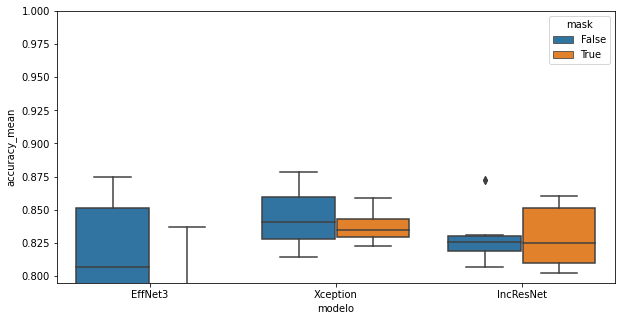

In [356]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.7947763194670227, 1.0)]

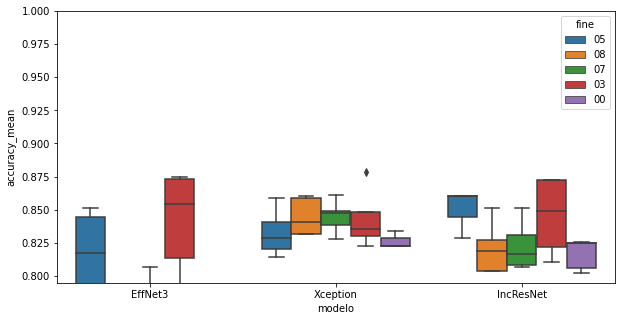

In [357]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="fine",
                data=data)
p.set(ylim=(lim, 1))

[(0.7947763194670227, 1.0)]

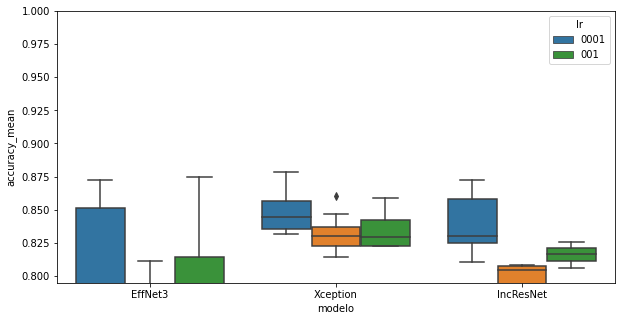

In [358]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

[(0.7947763194670227, 1.0)]

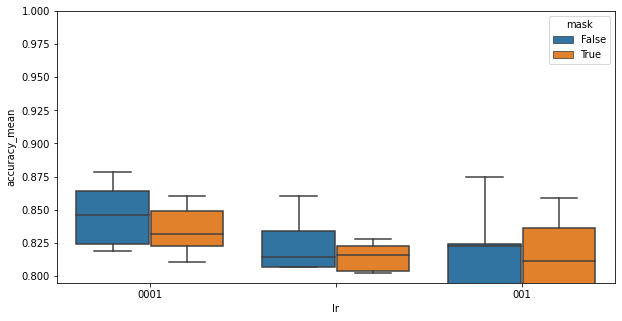

In [359]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="lr", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.7947763194670227, 1.0)]

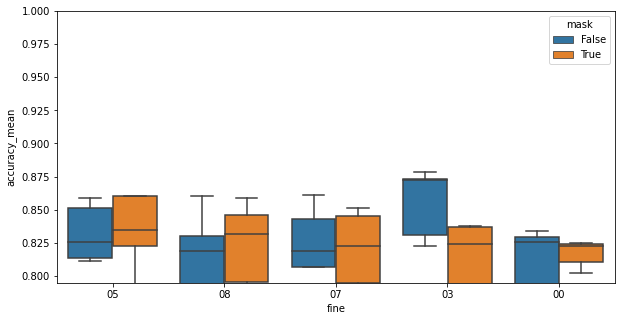

In [360]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.7947763194670227, 1.0)]

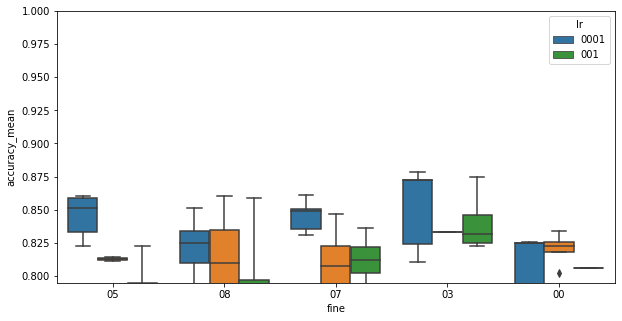

In [361]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

## SUBSET

In [362]:
df = df.reset_index(drop = True)

In [363]:
index = list(set(df.index) - set(index))
df = df.iloc[index]

In [364]:
df['mask'] = list(map(lambda x: bool(re.search('mask', x)), df['name']))

In [365]:
df['modelo'] = list(map(lambda x: re.split('_', x)[-5], df['name']))
df['lr'] = list(map(lambda x: re.split('-', re.split('_', x)[-2])[1], df['name']))
df['batch'] = list(map(lambda x: re.split('-', re.split('_', x)[-3])[1], df['name']))
df['fine'] = list(map(lambda x: re.split('-', re.split('_', x)[-4])[1], df['name']))

In [366]:
df['auc_mean'] = (df['auc_0']+df['auc_1']+df['auc_2'])/3
df['accuracy_mean'] = (df['accuracy_score_0']+
                             df['accuracy_score_1']+
                             df['accuracy_score_2'])/3

In [367]:
df.sort_values('auc_mean').tail()

,name,auc_0,younden_0,pr_max_0,pr_cut_0,auc_1,younden_1,pr_max_1,pr_cut_1,auc_2,...,"recall_score[1, 2]","accuracy_score[1, 2]",completo,mask,modelo,lr,batch,fine,auc_mean,accuracy_mean
36,prueba_mask_IncResNet_fine-05_batch-8_lr-0001_...,0.974515,0.066946,0.066946,0.11042541265487672,0.872377,0.057974,0.049864,0.5447177886962891,0.930372,...,0.854855,0.854855,False,True,IncResNet,0001,8,05,0.925755,0.857858
57,prueba_Xception_fine-08_batch-8_lr-001_auc-92,0.982717,0.196502,0.331068,0.13822942972183228,0.873779,0.382627,0.135059,0.590139627456665,0.923374,...,0.843844,0.843844,False,False,Xception,001,8,08,0.926623,0.860527
22,prueba_mask_Xception_fine-03_batch-8_lr-0001_a...,0.977626,0.079139,0.098225,0.10953118652105333,0.877251,0.567552,0.562125,0.6664933562278748,0.942451,...,0.877878,0.877878,False,True,Xception,0001,8,03,0.932443,0.853854
34,prueba_mask_IncResNet_fine-03_batch-8_lr-0001_...,0.975083,0.455335,0.673091,0.6264345645904541,0.878748,0.110022,0.026167,0.20630334317684174,0.943782,...,0.801802,0.801802,False,True,IncResNet,0001,8,03,0.932538,0.827828
6,prueba_EffNet3_fine-03_batch-8_lr-0001_auc-95,0.991293,0.122462,0.366291,0.3662910461425781,0.893384,0.219937,0.219937,0.3667306900024414,0.931752,...,0.852853,0.852853,False,False,EffNet3,0001,8,03,0.938810,0.870537


In [368]:
df.name.iloc[22]

'prueba_mask_Xception_fine-03_batch-8_lr-0001_auc-91'

In [369]:
df.columns

Index(['name', 'auc_0', 'younden_0', 'pr_max_0', 'pr_cut_0', 'auc_1',
       'younden_1', 'pr_max_1', 'pr_cut_1', 'auc_2', 'younden_2', 'pr_max_2',
       'pr_cut_2', 'f1_score_0', 'precision_score_0', 'recall_score_0',
       'accuracy_score_0', 'f1_score_1', 'precision_score_1', 'recall_score_1',
       'accuracy_score_1', 'f1_score_2', 'precision_score_2', 'recall_score_2',
       'accuracy_score_2', 'f1_score[0, 1]', 'precision_score[0, 1]',
       'recall_score[0, 1]', 'accuracy_score[0, 1]', 'f1_score[0, 2]',
       'precision_score[0, 2]', 'recall_score[0, 2]', 'accuracy_score[0, 2]',
       'f1_score[1, 2]', 'precision_score[1, 2]', 'recall_score[1, 2]',
       'accuracy_score[1, 2]', 'completo', 'mask', 'modelo', 'lr', 'batch',
       'fine', 'auc_mean', 'accuracy_mean'],
      dtype='object')

### Ploteo

In [370]:
y = 'accuracy_mean'
data = df
lim = np.percentile(data[y], 10)

[(0.6488488488488489, 1.0)]

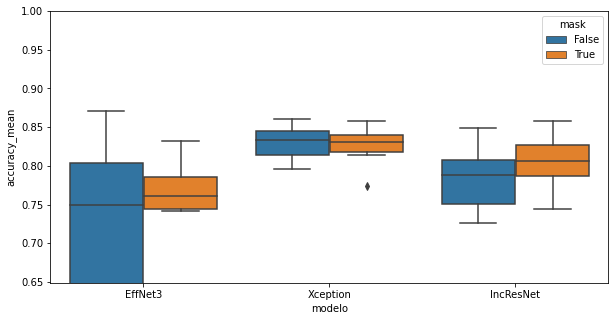

In [371]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.6488488488488489, 1.0)]

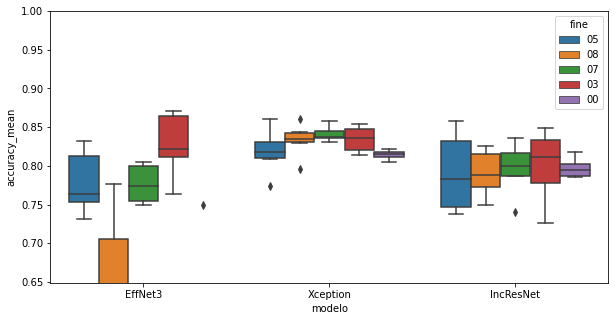

In [372]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="fine",
                data=data)
p.set(ylim=(lim, 1))

[(0.6488488488488489, 1.0)]

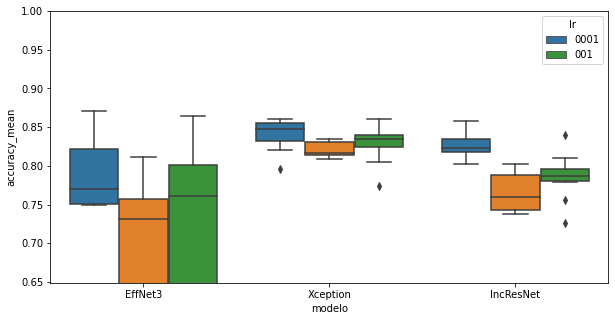

In [373]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

[(0.6488488488488489, 1.0)]

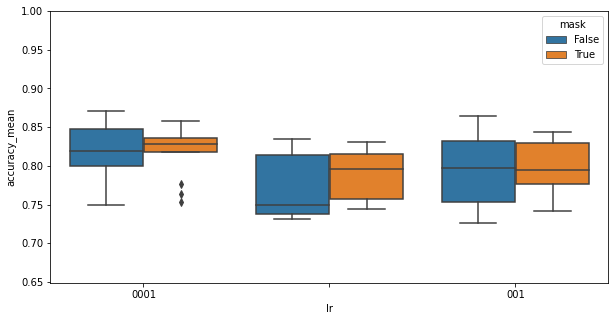

In [374]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="lr", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.6488488488488489, 1.0)]

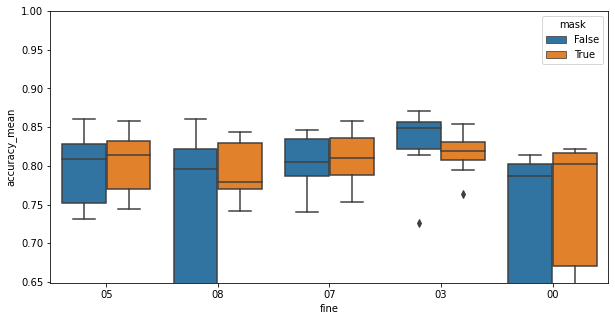

In [375]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.6488488488488489, 1.0)]

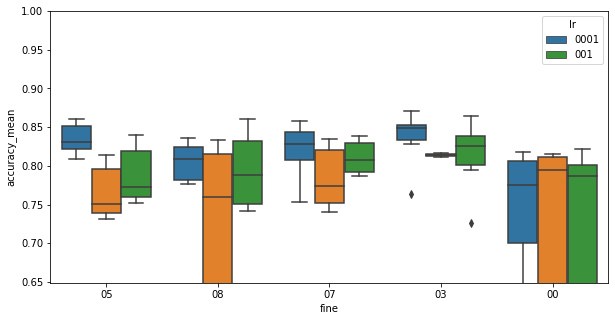

In [376]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

In [ ]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="lr", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

## Cada modelo

In [ ]:
import os
import cv2
import json

In [ ]:
model_name = 'prueba_Xception_fine-07_batch-8_lr-0001_auc-93_resto'

In [ ]:
p = os.path.join('/home/mr1142/Documents/Data/models/neumonia/validation_results', model_name)

In [ ]:
os.listdir(p)

In [ ]:
img = cv2.imread(os.path.join(p, 'pr_re_th_plot_2.png'))
plt.figure(figsize=(10,10))
plt.imshow(img)

In [ ]:
with open(os.path.join(p, 'metricas.json')) as json_file:
    data = json.load(json_file)
data

In [ ]:
df = pd.read_csv(os.path.join(p, 'class_report.csv'))
df